In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller

In [2]:
bitcoin_data = pd.read_csv("BTC-USD.csv", parse_dates=['Date'])
eth_data=pd.read_csv("ETH-USD.csv",parse_dates=['Date'])

In [3]:
bitcoin_data=bitcoin_data.drop(bitcoin_data[bitcoin_data.isnull().any(1)].index) #drop id=2148 data
eth_data=eth_data.drop(eth_data[eth_data.isnull().any(1)].index)

In [4]:
bitcoin_data=bitcoin_data.drop('Adj Close',axis=1)
eth_data=eth_data.drop('Adj Close',axis=1)

In [5]:
#daily returns 
#the formula is (close price of the day - open price of the day)*100%/open price of the day 
bitcoin_data['Daily_Returns_Percentages'] = ''
#bitcoin_data=bitcoin_data.drop('Daily_Returns_Percentages(%)',axis=1)
bitcoin_data = bitcoin_data.assign(Daily_Returns_Percentages= lambda x: (x.Close - x.Open)/x.Open*100)
eth_data['Daily_Returns_Percentages'] = ''
#bitcoin_data=bitcoin_data.drop('Daily_Returns_Percentages(%)',axis=1)
eth_data = eth_data.assign(Daily_Returns_Percentages= lambda x: (x.Close - x.Open)/x.Open*100)

In [6]:
#set index
bitcoin_data.set_index("Date", inplace=True)
eth_data.set_index("Date",inplace=True)

In [7]:
#calculate the average of daily closing price for bitcoin
last_index=bitcoin_data.index[-1]
last_index=str(last_index)
#for the last 2 years 
last_index_two_year=bitcoin_data.index[-1] - pd.DateOffset(years=2)
last_index_two_year=str(last_index_two_year).split()[0]
#calculate the average closing price
bitcoin_ave2yr=bitcoin_data[['Close']].loc[last_index_two_year:last_index].mean(axis=0)
print('The aveaege of daily closing price for Bitcoin over the last two years is $'+ str(float(bitcoin_ave2yr)))
#calcuate the average daily retunrs 
bitcoin_ave2yr_re=bitcoin_data[['Daily_Returns_Percentages']].loc[last_index_two_year:last_index].mean(axis=0)
print('The aveaege of daily returns for Bitcoin over the last two years is '+ str(float(bitcoin_ave2yr_re))+'%')


#for the last 6 months
last_index_six_month=bitcoin_data.index[-1] - pd.DateOffset(months=6)
last_index_six_month=str(last_index_six_month).split()[0]
#calcuate the average closing price
bitcoin_ave6mon=bitcoin_data[['Close']].loc[last_index_six_month:last_index].mean(axis=0)
print('The aveaege of daily closing price for Bitcoin over the last six months is $'+ str(float(bitcoin_ave6mon)))
#calcuate the average daily retunrs 
bitcoin_ave6mon_re=bitcoin_data[['Daily_Returns_Percentages']].loc[last_index_six_month:last_index].mean(axis=0)
print('The aveaege of daily returns for Bitcoin over the last six months is '+ str(float(bitcoin_ave6mon_re))+'%')

The aveaege of daily closing price for Bitcoin over the last two years is $7555.894799098494
The aveaege of daily returns for Bitcoin over the last two years is 0.16287066828991698%
The aveaege of daily closing price for Bitcoin over the last six months is $8881.954128395604
The aveaege of daily returns for Bitcoin over the last six months is 0.21956843717545707%


In [8]:
#calculate the average of daily closing price for ethereum
last_index_eth=eth_data.index[-1]
last_index_eth=str(last_index_eth)
#for the last 2 years 
last_index_two_year_eth=eth_data.index[-1] - pd.DateOffset(years=2)
last_index_two_year_eth=str(last_index_two_year_eth).split()[0]
#calculate the average closing price
eth_ave2yr=eth_data[['Close']].loc[last_index_two_year_eth:last_index_eth].mean(axis=0)
print('The aveaege of daily closing price for Ethereum over the last two years is $'+ str(float(eth_ave2yr)))
#calcualte the average daily returns
eth_ave2yr_re=eth_data[['Daily_Returns_Percentages']].loc[last_index_two_year_eth:last_index_eth].mean(axis=0)
print('The aveaege of daily returns for Ethereum over the last two years is '+ str(float(eth_ave2yr_re))+'%')


#for the last 6 months
last_index_six_month_eth=eth_data.index[-1] - pd.DateOffset(months=6)
last_index_six_month_eth=str(last_index_six_month_eth).split()[0]
#calcuate the average closing price
eth_ave6mon=eth_data[['Close']].loc[last_index_six_month_eth:last_index_eth].mean(axis=0)
print('The aveaege of daily closing price for Ethereum over the last six months is $'+ str(float(eth_ave6mon)))
#calcuate the average daily retunrs 
eth_ave6mon_re=eth_data[['Daily_Returns_Percentages']].loc[last_index_six_month:last_index].mean(axis=0)
print('The aveaege of daily returns for Ethereum over the last six months is '+ str(float(eth_ave6mon_re))+'%')

The aveaege of daily closing price for Ethereum over the last two years is $195.3535710642955
The aveaege of daily returns for Ethereum over the last two years is 0.16345472001294695%
The aveaege of daily closing price for Ethereum over the last six months is $230.7210648296704
The aveaege of daily returns for Ethereum over the last six months is 0.3865066473768706%


In [9]:
#calcualte the standard deviation of closing price and daily returns for Bitcoin
#for the last 2 years 
bitcoin_ave2yr_std=bitcoin_data[['Close']].loc[last_index_two_year:last_index].std(axis=0)
print('The standard deviation of daily closing price for Bitcoin over the last two years is $'+str(float(bitcoin_ave2yr_std)))
bitcoin_ave2yr_std_re=bitcoin_data[['Daily_Returns_Percentages']].loc[last_index_two_year:last_index].std(axis=0)
print('The standard deviation of daily returns for Bitcoin over the last two years is '+str(float(bitcoin_ave2yr_std_re))+'%')
#for the last 6 months
bitcoin_ave6mon_std=bitcoin_data[['Close']].loc[last_index_six_month:last_index].std(axis=0)
print('The standard deviation of daily closing price for Bitcoin over the last six months is $'+str(float(bitcoin_ave6mon_std)))
bitcoin_ave6mon_std_re=bitcoin_data[['Daily_Returns_Percentages']].loc[last_index_six_month:last_index].std(axis=0)
print('The standard deviation of daily returns for Bitcoin over the last six months is '+str(float(bitcoin_ave6mon_std_re))+'%')

The standard deviation of daily closing price for Bitcoin over the last two years is $2397.0860784574793
The standard deviation of daily returns for Bitcoin over the last two years is 3.73934338368008%
The standard deviation of daily closing price for Bitcoin over the last six months is $1646.3145097110926
The standard deviation of daily returns for Bitcoin over the last six months is 4.466176941780512%


In [10]:
#calcualte the standard deviation of closing price and daily returns for Ethereum
#for the last 2 years 
eth_ave2yr_std=eth_data[['Close']].loc[last_index_two_year_eth:last_index_eth].std(axis=0)
print('The standard deviation of daily closing price for Ethereum over the last two years is $'+str(float(eth_ave2yr_std)))
eth_ave2yr_std_re=eth_data[['Daily_Returns_Percentages']].loc[last_index_two_year_eth:last_index_eth].std(axis=0)
print('The standard deviation of daily returns for Ethereum over the last two years is '+str(float(eth_ave2yr_std_re))+'%')
#for the last 6 months
eth_ave6mon_std=eth_data[['Close']].loc[last_index_six_month_eth:last_index_eth].std(axis=0)
print('The standard deviation of daily closing price for Ethereum over the last six months is $'+str(float(eth_ave6mon_std)))
eth_ave2yr_std=eth_data[['Daily_Returns_Percentages']].loc[last_index_six_month_eth:last_index_eth].std(axis=0)
print('The standard deviation of daily returns for Ethereum over the last six months is '+str(float(eth_ave6mon_std))+'%')

The standard deviation of daily closing price for Ethereum over the last two years is $62.166946894116805
The standard deviation of daily returns for Ethereum over the last two years is 4.810769797826212%
The standard deviation of daily closing price for Ethereum over the last six months is $75.47950351666708
The standard deviation of daily returns for Ethereum over the last six months is 75.47950351666708%


The Dickey Fuller test for the close price of Bitcoin for the past 2 years:
ADF = -1.086091366078764
p-value = 0.720586517015094
Under 95% confidence interval, we can not reject the null hypothesis, and the time series is non-staionary.
The Dickey Fuller test for the close price of Bitcoin for the past 6 months:
ADF = -0.7100332791802169
p-value = 0.8441335472388685
Under 95% confidence interval, we can not reject the null hypothesis, and the time series is non-staionary.


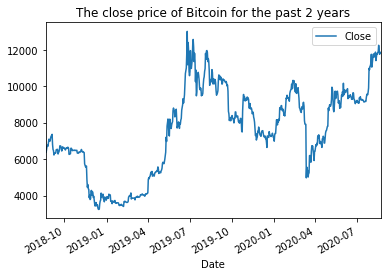

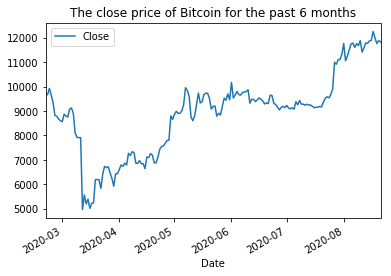

In [17]:
#check the stationary of Bitcoin 

#for the last 2 years
bitcoin_data[['Close']].loc[last_index_two_year:last_index].plot()
pyplot.title('The close price of Bitcoin for the past 2 years')
adf_test_bitcoin_two_year = adfuller(bitcoin_data['Close'].loc[last_index_two_year:last_index])
print("The Dickey Fuller test for the close price of Bitcoin for the past 2 years:")
print ("ADF = " +str(adf_test_bitcoin_two_year[0]))
print ("p-value = "+str(adf_test_bitcoin_two_year[1]))
if float(adf_test_bitcoin_two_year[1])<0.05:
    print("Under 95% confidence interval, we can reject the null hypothesis, and the time series is staionary.")
else:
    print("Under 95% confidence interval, we can not reject the null hypothesis, and the time series is non-staionary.")
#for the last 6 months
bitcoin_data[['Close']].loc[last_index_six_month:last_index].plot()
pyplot.title('The close price of Bitcoin for the past 6 months')
adf_test_bitcoin_six_month = adfuller(bitcoin_data['Close'].loc[last_index_six_month:last_index])
print("The Dickey Fuller test for the close price of Bitcoin for the past 6 months:")
print ("ADF = " +str(adf_test_bitcoin_six_month[0]))
print ("p-value = "+str(adf_test_bitcoin_six_month[1]))
if float(adf_test_bitcoin_six_month[1])<0.05:
    print("Under 95% confidence interval, we can reject the null hypothesis, and the time series is staionary.")
else:
    print("Under 95% confidence interval, we can not reject the null hypothesis, and the time series is non-staionary.")

The Dickey Fuller test for the close price of Ethereum for the past 2 years:
ADF = -1.864948433783679
p-value = 0.34872579199194476
Under 95% confidence interval, we can not reject the null hypothesis, and the time series is non-staionary.
The Dickey Fuller test for the close price of Ethereum for the past 6 months:
ADF = -0.6857607570237125
p-value = 0.8504034279445978
Under 95% confidence interval, we can not reject the null hypothesis, and the time series is non-staionary.


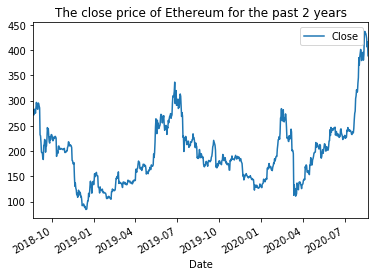

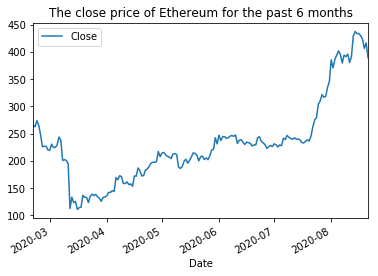

In [18]:
#check the stationary of Ethereum 

#for the last 2 years
eth_data[['Close']].loc[last_index_two_year_eth:last_index_eth].plot()
pyplot.title('The close price of Ethereum for the past 2 years')
adf_test_eth_two_year = adfuller(eth_data['Close'].loc[last_index_two_year_eth:last_index_eth])
print("The Dickey Fuller test for the close price of Ethereum for the past 2 years:")
print ("ADF = " +str(adf_test_eth_two_year[0]))
print ("p-value = "+str(adf_test_eth_two_year[1]))
if float(adf_test_eth_two_year[1])<0.05:
    print("Under 95% confidence interval, we can reject the null hypothesis, and the time series is staionary.")
else:
    print("Under 95% confidence interval, we can not reject the null hypothesis, and the time series is non-staionary.")
#for the last 6 months
eth_data[['Close']].loc[last_index_six_month_eth:last_index_eth].plot()
pyplot.title('The close price of Ethereum for the past 6 months')
adf_test_eth_six_month = adfuller(eth_data['Close'].loc[last_index_six_month_eth:last_index_eth])
print("The Dickey Fuller test for the close price of Ethereum for the past 6 months:")
print ("ADF = " +str(adf_test_eth_six_month[0]))
print ("p-value = "+str(adf_test_eth_six_month[1]))
if float(adf_test_eth_six_month[1])<0.05:
    print("Under 95% confidence interval, we can reject the null hypothesis, and the time series is staionary.")
else:
    print("Under 95% confidence interval, we can not reject the null hypothesis, and the time series is non-staionary.")

In [13]:
import statsmodels.tsa.stattools as ts 

#calculate the cointergrate for the last 2 years
result1=ts.coint(bitcoin_data[['Close']].loc[last_index_two_year:last_index], eth_data[['Close']].loc[last_index_two_year_eth:last_index_eth])

p_value=result1[1] #get the p-value
if p_value>0.05:
    print("The p-value is "+str(p_value)+" which is greater than 0.05. So under 5% significance level, we can not reject the null hypotheis. Null hypothesis is that the past two years' two closing prices can not be co-integrated.")
else:
    print("The p-value is "+str(p_value)+" which is smaller than or equal to 0.05. So under 5% significance level, we can reject the null hypotheis. Null hypothesis is that the past two years' two closing prices can not be co-integrated.")

#calculate the cointergrate for the last 6 months
result2=ts.coint(bitcoin_data[['Close']].loc[last_index_six_month:last_index], eth_data[['Close']].loc[last_index_six_month_eth:last_index_eth])

p_value=result2[1] #get the p-value
if p_value>0.05:
    print("The p-value is "+str(p_value)+" which is greater than 0.05. So under 5% significance level, we can not reject the null hypotheis. Null hypothesis is that the past six months' two closing prices can not be co-integrated.")
else:
    print("The p-value is "+str(p_value)+" which is smaller than or equal to 0.05. So under 5% significance level, we can reject the null hypotheis. Null hypothesis is that the past six months' two closing prices can not be co-integrated.")


The p-value is 0.5010040501215612 which is greater than 0.05. So under 5% significance level, we can not reject the null hypotheis. Null hypothesis is that the past two years' two closing prices can not be co-integrated.
The p-value is 0.44103302126956817 which is greater than 0.05. So under 5% significance level, we can not reject the null hypotheis. Null hypothesis is that the past six months' two closing prices can not be co-integrated.
